## Test of inverted double pendulum control with mppi


In [1]:
import torch
import numpy as np
import pybullet as p
import pybullet_data as pd
from base_env import BaseEnv
import gym
from mppi import MPPI
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation
from IPython import display
from tqdm.notebook import tqdm
from celluloid import Camera
import os
import imageio

pybullet build time: May 20 2022 19:44:17


In [2]:
%load_ext autoreload
%autoreload 2

In [27]:
from double_pendulum_system import *
controller = DoublePendulumControl(dynamics=dynamics_analytic,cost_function=cost_function,horizon=17)
initial_state = torch.from_numpy(np.random.randn(6))
initial_state = torch.tensor([0,0,np.pi,0,np.pi,0])
state = initial_state
target = torch.tensor([0,0,0,0,0,0])
num_steps = 100
pbar = tqdm(range(num_steps))

if not os.path.exists('plots'):
    os.makedirs('plots')

for i in pbar:
    
    action = controller.control_calcu(state)
    # print(action)
    
    # action -= K*state[0]

    state = dynamics_analytic(state,action)
    state = state.squeeze()
    # print(state)
    error_i = np.linalg.norm((state-target)@torch.diag(torch.tensor([0.01, 0.1, 1, 0.1, 1, 0.1])))
    pbar.set_description(f'Goal Error: {error_i:.4f}')

    # --- Start plotting
    fig, ax = plt.subplots()
    ax = plt.axes(xlim=(state[0]-10, state[0]+10), ylim=(-2, 2))
    ax.set_aspect('equal')
    ax.grid()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Double Pendulum at t={:.2f}'.format(i*0.05))
    x = state[0]
    theta1 = state[2]
    theta2 = state[4]
    L1 = 0.5
    L2 = 0.5
    x1 = x + L1*torch.sin(theta1)
    y1 = L1*torch.cos(theta1)
    x2 = x1 + L2*torch.sin(theta2)
    y2 = y1 + L2*torch.cos(theta2)
    plt.plot([x,x1],[0,y1],color='black')   
    plt.plot([x1,x2],[y1,y2],color='black')
    filename = os.path.join('plots', 'plot_{:03d}.png'.format(i))
    # plt.show()
    plt.savefig(filename)
    plt.close()
    if error_i < 0.25:
        num_steps = i
        break
    # --- End plotting

images = []
for i in range(num_steps):
    filename = os.path.join('plots', 'plot_{:03d}.png'.format(i))
    images.append(imageio.imread(filename))
imageio.mimsave('double_pendulum.gif', images, duration=0.1)



  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipykernel_4187/2453447376.py:57: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [4]:
from DDPController import *
from doublePendulumDynamics import *
import autograd.numpy as np

state_dim = 6
action_dim = 1
x_final = np.array([.0, .0, .0, .0, .0, .0])
Q = np.diag([10, 0, 40, .1, 40, .1])
R = np.array([[.04]])
terminal_scale = 10
cost = Cost(x_final, terminal_scale, Q, R)
dynamics_analytic = dynamics_numpy

controller = DDPcontroller(dynamics_analytic, cost)
initial_state = np.random.randn(state_dim)
state = initial_state

num_steps = 10
pbar = tqdm(range(num_steps))

if not os.path.exists('plots'):
    os.makedirs('plots')

for i in pbar:
    
    action = controller.command(state)
    # print(action)
    
    # action -= K*state[0]

    # state = dynamics_analytic(state,action)
    # state = state.squeeze()
    # # print(state)
    # error_i = np.linalg.norm(state[1:]-target[1:])
    # pbar.set_description(f'Goal Error: {error_i:.4f}')

#     # --- Start plotting
#     fig, ax = plt.subplots()
#     ax = plt.axes(xlim=(state[0]-10, state[0]+10), ylim=(-2, 2))
#     ax.set_aspect('equal')
#     ax.grid()
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_title('Double Pendulum at t={:.2f}'.format(i*0.05))
#     x = state[0]
#     theta1 = state[2]
#     theta2 = state[4]
#     L1 = 0.5
#     L2 = 0.5
#     x1 = x + L1*torch.sin(theta1)
#     y1 = L1*torch.cos(theta1)
#     x2 = x1 + L2*torch.sin(theta2)
#     y2 = y1 + L2*torch.cos(theta2)
#     plt.plot([x,x1],[0,y1],color='black')   
#     plt.plot([x1,x2],[y1,y2],color='black')
#     filename = os.path.join('plots', 'plot_{:03d}.png'.format(i))
#     plt.savefig(filename)
#     plt.close()
#     if error_i < 0.1:
#         break
#     # --- End plotting

# images = []
# for i in range(num_steps):
#     filename = os.path.join('plots', 'plot_{:03d}.png'.format(i))
#     images.append(imageio.imread(filename))
# imageio.mimsave('double_pendulum.gif', images, duration=0.1)



  0%|          | 0/10 [00:00<?, ?it/s]

122399.68241518472


c:\Users\Lamfu\PycharmProjects\ROB_498\venv\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


KeyboardInterrupt: 

  0%|          | 0/100 [00:00<?, ?it/s]

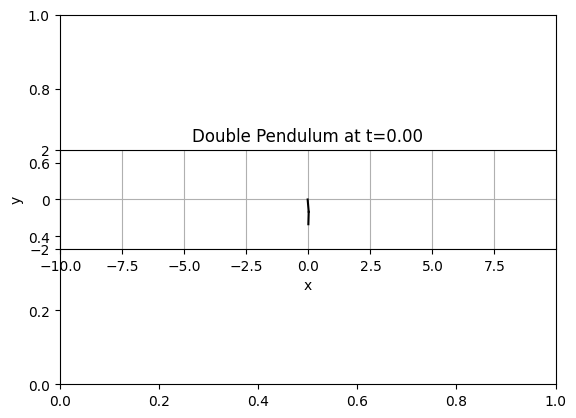

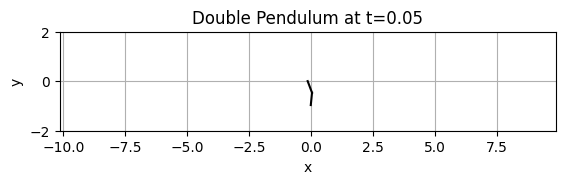

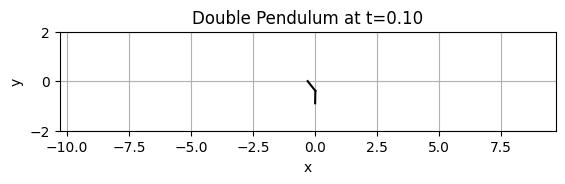

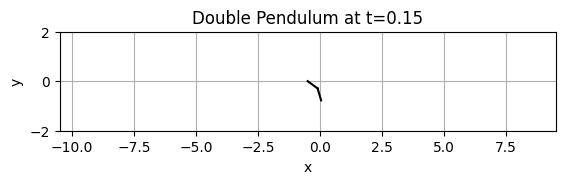

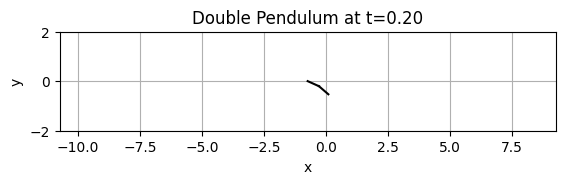

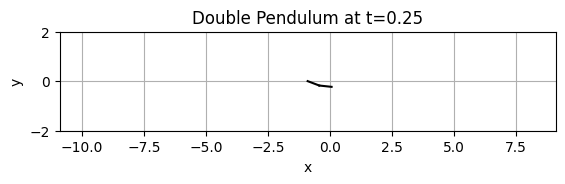

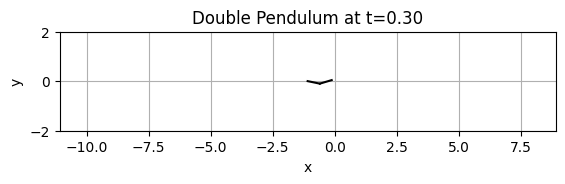

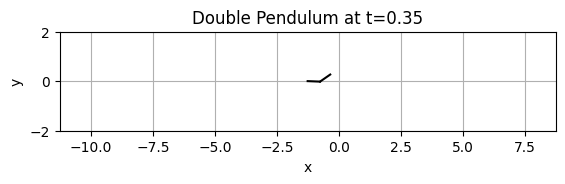

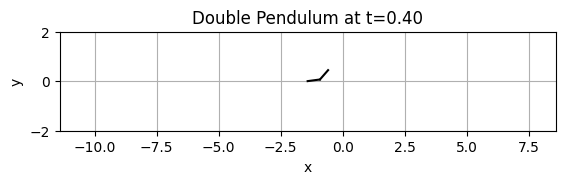

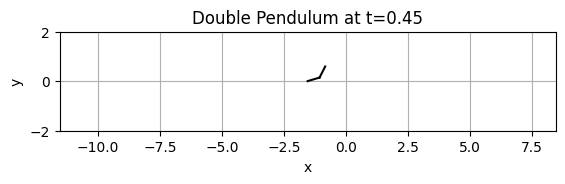

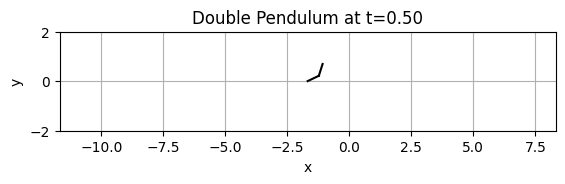

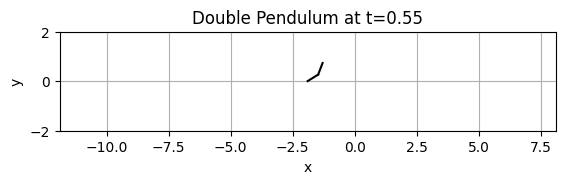

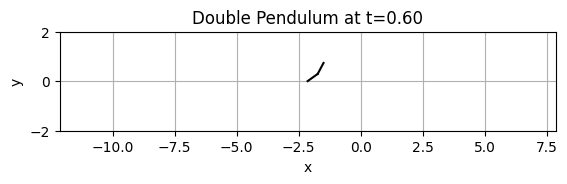

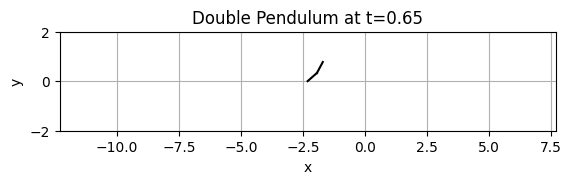

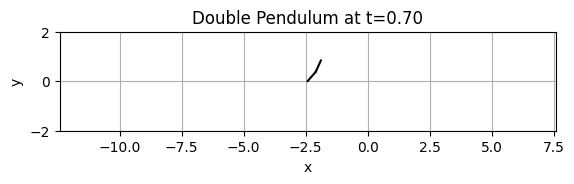

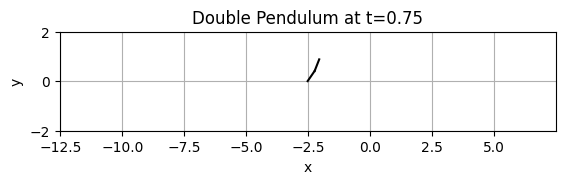

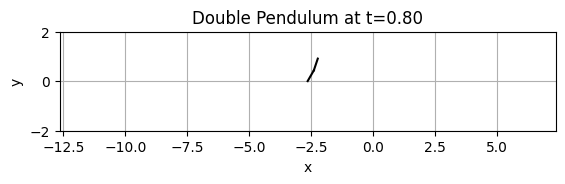

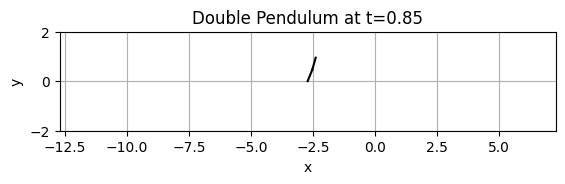

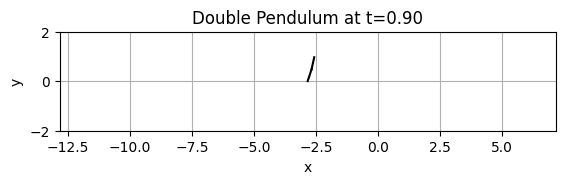

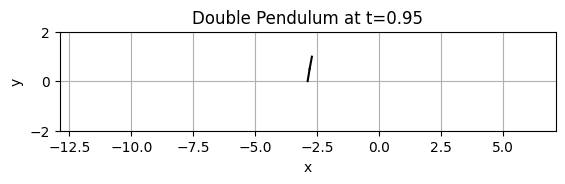

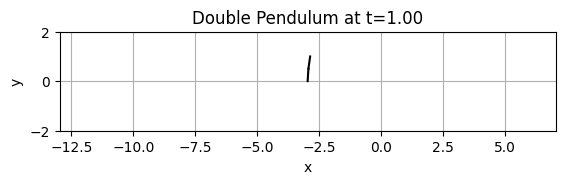

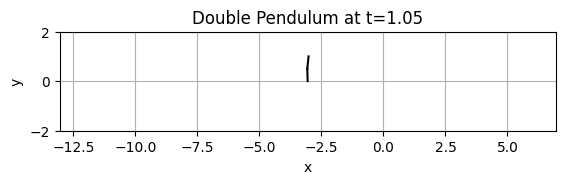

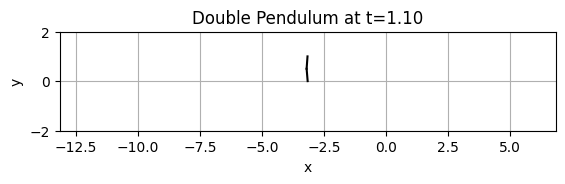

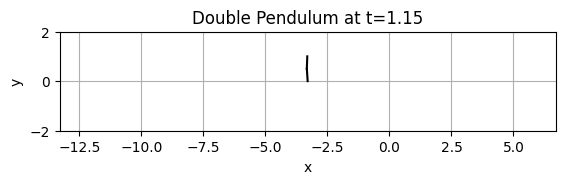

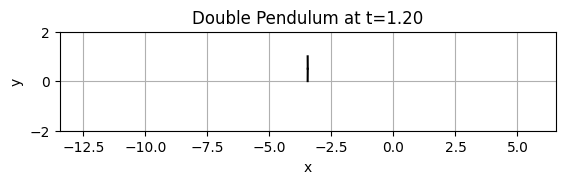

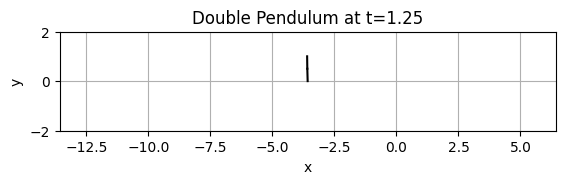

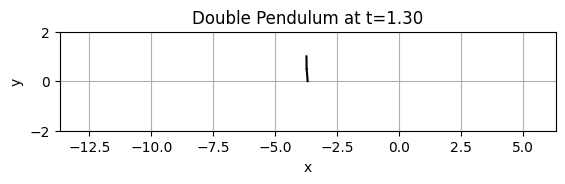

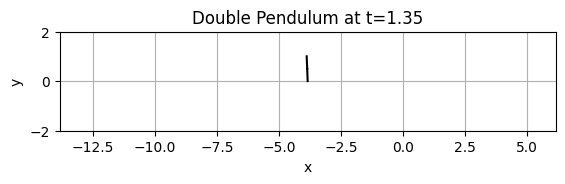

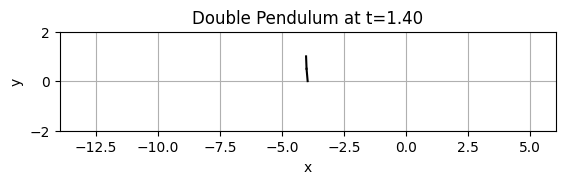

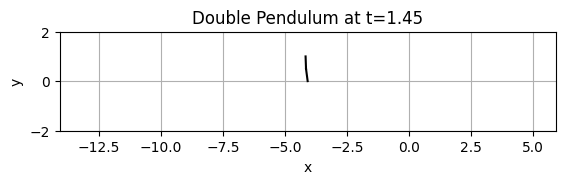

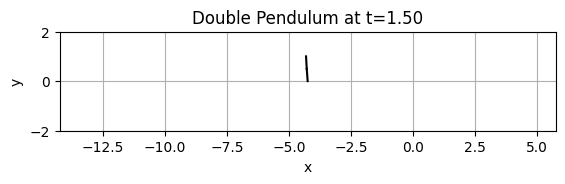

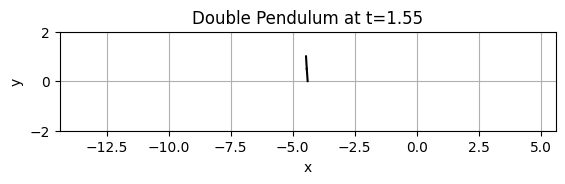

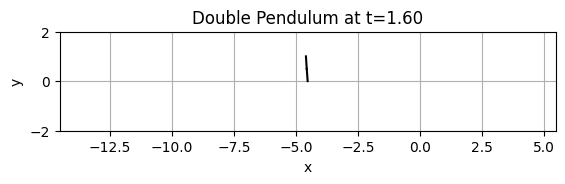

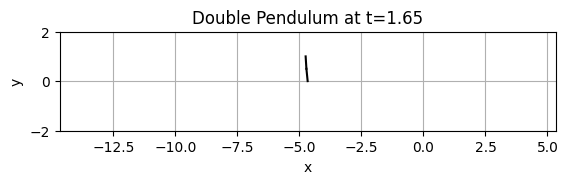

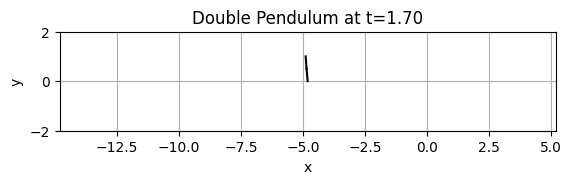

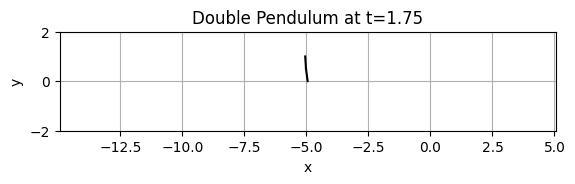

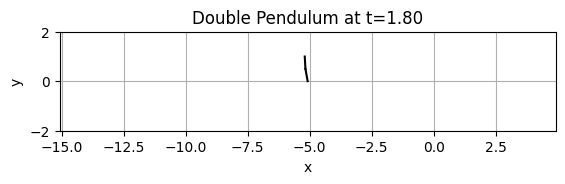

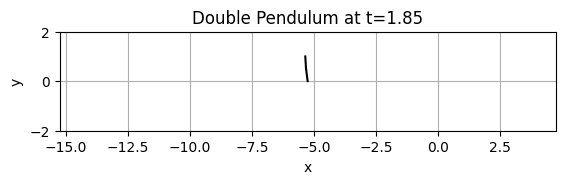

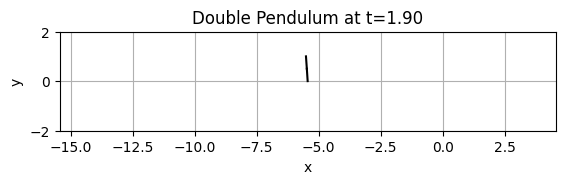

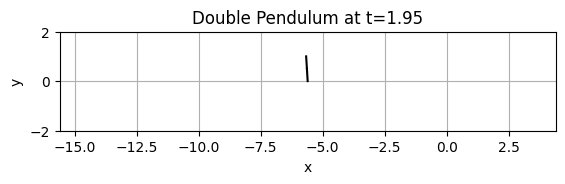

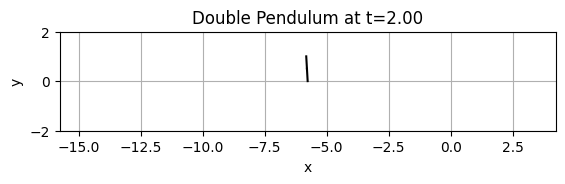

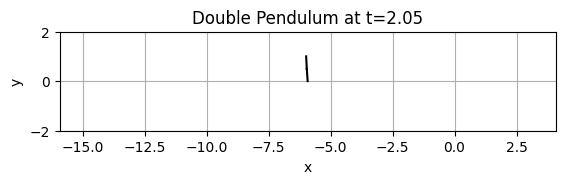

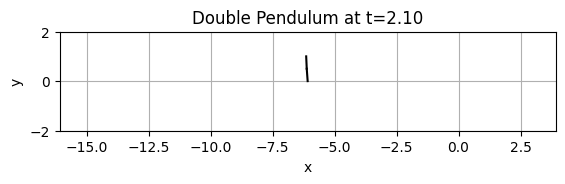

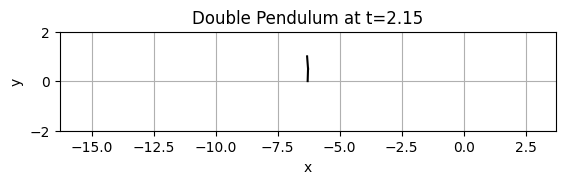

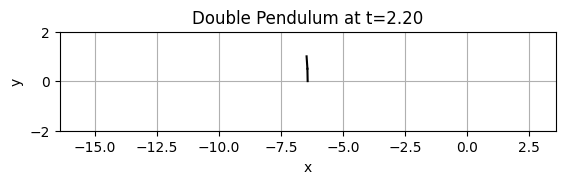

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [4]:

# %load_ext autoreload
# %autoreload 2

from double_pendulum_system import *
controller = DoublePendulumControl(dynamics=dynamics_analytic,cost_function=cost_function)
initial_state = torch.from_numpy(np.random.randn(6))
initial_state = torch.tensor([0,0,np.pi,0,np.pi,0])
state = initial_state
target = torch.tensor([0,0,0,0,0,0])
num_steps = 100
pbar = tqdm(range(num_steps))

# if not os.path.exists('plots'):
#     os.makedirs('plots')

fig, ax = plt.subplots()
for i in pbar:
    
    action = controller.control_calcu(state)
    # print(action)
    
    # action -= K*state[0]

    state = dynamics_analytic(state,action)
    state = state.squeeze()
    # print(state)
    error_i = np.linalg.norm(state[1:]-target[1:])
    pbar.set_description(f'Goal Error: {error_i:.4f}')

    # --- Start plotting

    ax = plt.axes(xlim=(state[0]-10, state[0]+10), ylim=(-2, 2))
    ax.set_aspect('equal')
    ax.grid()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Double Pendulum at t={:.2f}'.format(i*0.05))
    x = state[0]
    theta1 = state[2]
    theta2 = state[4]
    L1 = 0.5
    L2 = 0.5
    x1 = x + L1*torch.sin(theta1)
    y1 = L1*torch.cos(theta1)
    x2 = x1 + L2*torch.sin(theta2)
    y2 = y1 + L2*torch.cos(theta2)
    plt.plot([x,x1],[0,y1],color='black')   
    plt.plot([x1,x2],[y1,y2],color='black')
    plt.draw()
    plt.pause(1e-17)
    # time.sleep(0.025)
    plt.clf()
    
    
    if error_i < 0.1:
        break
    # --- End plotting
plt.show()
plt.close()
